In [25]:
-1*-0.5441+4*0.5562+4*0.4074

w = np.array([-0.5441,0.5562,0.4074]) + 0.1 * (-1) * np.array([-1,4,4])
w

v = -1 * w[0] + 2 * w[1] + 2 * w[2]
v

v = -1 * w[0] + 4 * w[1] + 4 * w[2]
v

w2 = w + (0.1 * (-1) * np.array([-1,4,4]))
w2

v = -1 * w2[0] + 2 * w2[1] + 2 * w2[2]
v

w3 = w2 + (0.1 * (1) * np.array([-1,2,2]))
w3

v = -1 * w3[0] + 4 * w3[1] + 4 * w3[2]
v

v = -1 * w3[0] + 2 * w3[1] + 2 * w3[2]
v

w4 = w3 + (0.1 * (1) * np.array([-1,2,2]))
w4

v = -1 * w4[0] + 4 * w4[1] + 4 * w4[2]
v

In [33]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [20]:
size = 5
weights = np.random.uniform(low=-1, high=1, size=size)
print(weights)

[-0.89358845  0.22211659  0.79442875 -0.94374265  0.60164899]


In [21]:
def phi(v):
    if v > 0:
        return 1
    return 0    

In [80]:
def perceptron(w, X, D, learn_rate):
    epochs = 0
    MAX_ITER = 10
    error = True

    while error and epochs < MAX_ITER:
        error = False
        epochs += 1
        #print(f"Época: {epochs}")
        for i in range(0,len(X)):
            v = np.dot(X[i], w)
            y = phi(v)
            if y != D[i]:
                w = w + learn_rate * (D[i] - y) * X[i]
                #print(w)
                error = True
    return w

In [127]:
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')

In [134]:
def hyperplan(w):
    xmin, xmax = plt.xlim()
    slope = -w[1]/w[2]
    yIntercept = -w[0]/w[2]
    xx = np.linspace(xmin, xmax)
    slopeX, intercept = np.polyfit(xx, w, 1)
    print(slopeX,intercept)
    y = slope * xx + yIntercept
    abline(slope, yIntercept)
    #y = (-(w[0] / w[2]) / (w[0] / w[1]))*xx + (-w[0] / w[2])
    return y, xx

EXEMPLO 1
[-0.5441 -0.0438 -0.1926]


TypeError: expected x and y to have same length

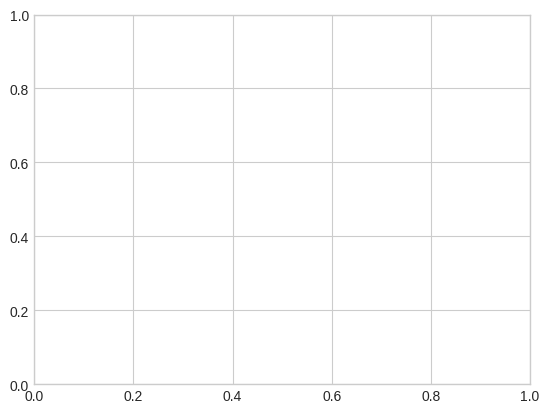

In [135]:
# Exemplo 1
print("EXEMPLO 1")
w = np.array([-0.5441, 0.5562, 0.4074])
bias = -1
X = np.array([[bias,2,2],[bias,4,4]])
D = np.array([1,0])
learn_rate = 0.1

outW = perceptron(w, X, D, learn_rate) 
print(outW)
y, xx = hyperplan(outW)
print(y)
plt.plot(y,xx,linestyle='solid')
plt.plot(X[0][1], X[0][2], 'o')
plt.plot(X[1][1], X[1][2], 'x')
plt.show()
print("\n")

# Exercicio 1
print("EXERCICIO 1")
w = np.array([0.5, 0.5, 0.5])
bias = 1
X = np.array([[bias,0,0],[bias,0,1],[bias,1,0],[bias,1,1]])
D = np.array([0,1,1,1])
learn_rate = 0.1

outW = perceptron(w, X, D, learn_rate) 
print(outW)
y, xx = hyperplan(outW)
print(y)
plt.plot(y,xx, linestyle='solid')
plt.plot(X[0][1], X[0][2], 'o')
plt.plot(X[1][1], X[1][2], 'x')
plt.plot(X[2][1], X[2][2], 'x')
plt.plot(X[3][1], X[3][2], 'x')
plt.show()

In [ ]:
slope, intercept = np.polyfit(np.linspace(xmin, xmax), outW, 1)

In [151]:
import requests
import pandas as pd
import json

url = 'https://api.footprintnetwork.org/v1/data/21/all'
user_name = 'matheus-mileski'
api_key = 'amc5T5c8a9dlIavj13u6m3I93i3dLpder1ck4qD0lm42t91utqg'
headers = {"HTTP_ACCEPT":"application/json"}
21
response = requests.get(url, auth=(user_name, api_key), headers=headers)

#print('Status code:', response.status_code)
#print(response.json())

df = pd.DataFrame.from_records(response.json())
df

,value,year,shortName,record,countryCode,countryName,isoa2,cropLand,grazingLand,forestLand,fishingGround,builtupLand,carbon,score
0,1.778476e+08,1961,Brazil,EFProdTotGHA,21,Brazil,BR,3.221756e+07,7.565527e+07,4.657233e+07,2.152884e+06,5.004354e+06,1.624520e+07,3A
1,2.360913e+00,1961,Brazil,EFProdPerCap,21,Brazil,BR,4.276857e-01,1.004318e+00,6.182441e-01,2.857936e-02,6.643242e-02,2.156538e-01,3A
2,7.953437e+06,1961,Brazil,EFImportsTotGHA,21,Brazil,BR,2.898660e+06,1.970624e+05,3.246761e+05,5.788752e+05,0.000000e+00,3.954163e+06,3A
3,1.055813e-01,1961,Brazil,EFImportsPerCap,21,Brazil,BR,3.847949e-02,2.615989e-03,4.310050e-03,7.684525e-03,0.000000e+00,5.249122e-02,3A
4,7.894603e+06,1961,Brazil,EFExportsTotGHA,21,Brazil,BR,5.410082e+06,1.067714e+06,8.544212e+05,1.738749e+05,0.000000e+00,3.885111e+05,3A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
981,1.732398e+00,2018,Brazil,Earths,21,Brazil,BR,3.313409e-01,4.235426e-01,2.972151e-01,3.755799e-02,1.461646e-01,4.965763e-01,3A
982,1.677254e+00,2019,Brazil,Earths,21,Brazil,BR,3.275692e-01,4.119795e-01,2.618013e-01,3.689056e-02,1.498021e-01,4.892116e-01,3A
983,1.630744e+00,2020,Brazil,Earths,21,Brazil,BR,3.340245e-01,4.075090e-01,2.518200e-01,3.661810e-02,1.537831e-01,4.469893e-01,3A
984,1.705483e+00,2021,Brazil,Earths,21,Brazil,BR,3.350250e-01,4.087228e-01,2.525700e-01,3.672717e-02,1.552818e-01,5.171561e-01,3A


In [154]:
df.groupby(['year','record']).sum()

/tmp/ipykernel_44/1459094557.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['year','record']).sum()


value  countryCode      cropLand   grazingLand  \
year record                                                                
1961 AreaPerCap    1.100485e+01           21  4.174167e-01  1.666202e+00   
     AreaTotHA     8.289953e+08           21  3.144400e+07  1.255150e+08   
     BiocapPerCap  2.398378e+01           21  4.276857e-01  1.723827e+00   
     BiocapTotGHA  1.806698e+09           21  3.221756e+07  1.298559e+08   
     EFConsPerCap  2.361694e+00           21  3.943468e-01  9.927601e-01   
...                         ...          ...           ...           ...   
2022 EFProdTotGHA  7.149303e+08           21  1.821610e+08  1.736788e+08   
     Earths        1.689706e+00           21  3.361234e-01  4.100629e-01   
     GDP-PPP       6.845165e+01           21  0.000000e+00  0.000000e+00   
     GDP-USD       8.514402e+03           21  0.000000e+00  0.000000e+00   
     Population    2.153140e+08           21  0.000000e+00  0.000000e+00   

                     forestLand  fishingGround   builtupLand        carbon  
year record                                                                 
1961 AreaPerCap    7.738404e+00   1.150200e+00  3.262671e-02  0.000000e+00  
     AreaTotHA     5.829339e+08   8.664460e+07  2.457770e+06  0.000000e+00  
     BiocapPerCap  2.129664e+01   4.692013e-01  6.643242e-02  0.000000e+00  
     BiocapTotGHA  1.604276e+09   3.534494e+07  5.004354e+06  0.000000e+00  
     EFConsPerCap  6.112117e-01   3.395571e-02  6.643242e-02  2.629875e-01  
...                         ...            ...           ...           ...  
2022 EFProdTotGHA  1.455913e+08   9.358119e+06  5.098062e+07  1.531604e+08  
     Earths        2.533981e-01   3.684758e-02  1.567812e-01  4.964924e-01  
     GDP-PPP       0.000000e+00   0.000000e+00  0.000000e+00  0.000000e+00  
     GDP-USD       0.000000e+00   0.000000e+00  0.000000e+00  0.000000e+00  
     Population    0.000000e+00   0.000000e+00  0.000000e+00  0.000000e+00  

[986 rows x 8 columns]

In [156]:
df['record'].unique()

array(['EFProdTotGHA', 'EFProdPerCap', 'EFImportsTotGHA',
       'EFImportsPerCap', 'EFExportsTotGHA', 'EFExportsPerCap',
       'EFConsTotGHA', 'EFConsPerCap', 'BiocapTotGHA', 'BiocapPerCap',
       'AreaTotHA', 'AreaPerCap', 'GDP-USD', 'GDP-PPP', 'HDI',
       'Population', 'Earths'], dtype=object)